# Use Image Classification on the hand written digits data set (mnist)


In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


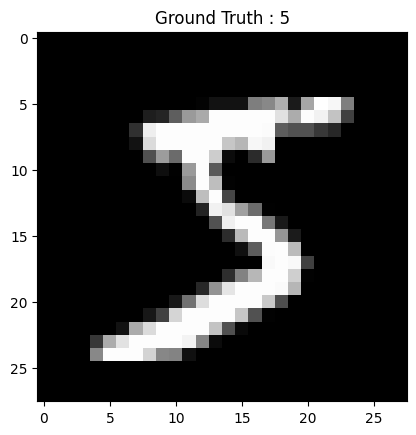

In [3]:
import matplotlib.pyplot as plt

#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

In [4]:
train_images.shape[1:]

(28, 28)

In [5]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [6]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [7]:
#scale data
train_data /=255.0
test_data /=255.0

In [8]:

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


In [9]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 1. Plot the loss and accuracy for both training data and validation data using the history object in the source code.

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 5s 18ms/step - loss: 0.2930 - accuracy: 0.9092 - val_loss: 0.1336 - val_accuracy: 0.9580
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1005 - accuracy: 0.9685 - val_loss: 0.0868 - val_accuracy: 0.9708
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0642 - accuracy: 0.9796 - val_loss: 0.0833 - val_accuracy: 0.9737
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0436 - accuracy: 0.9869 - val_loss: 0.0685 - val_accuracy: 0.9776
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0936 - val_accuracy: 0.9702
Epoch 6/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0679 - val_accuracy: 0.9815
Epoch 7/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0925 - val_accuracy: 0.9749

In [11]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0777 - accuracy: 0.9815
Evaluation result on Test Data : Loss = 0.07773816585540771, accuracy = 0.9815000295639038


In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

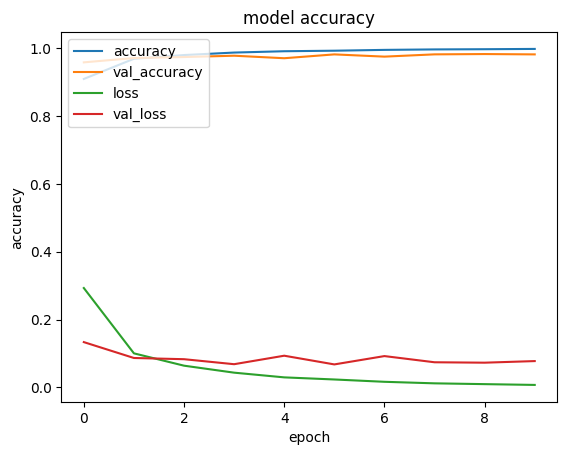

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

# 2. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.

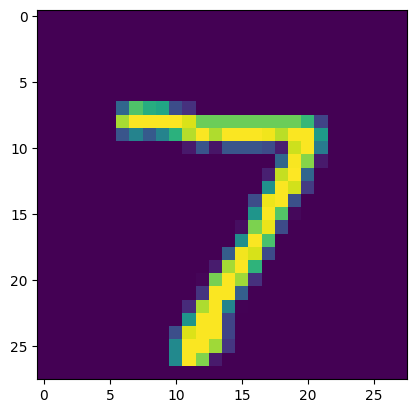

In [14]:
plt.imshow(test_data[0].reshape(28,28));

In [15]:
print("predicted label:",model.predict(test_data[0].reshape(1,784)))

1/1 [==============================] - 0s 58ms/step
predicted label: [[3.3195668e-12 2.7578282e-09 6.5644873e-10 6.4444293e-08 4.3635527e-13
  1.6975851e-12 1.4984657e-15 9.9999988e-01 1.4434943e-12 1.0142290e-09]]


# 3. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.

In [16]:
#increasing the number of hidden layers to 4
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss1, test_acc1] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with 4 hidden layers: Loss = {}, accuracy = {}".format(test_loss1, test_acc1))


Epoch 1/10
235/235 [==============================] - 8s 31ms/step - loss: 0.3379 - accuracy: 0.8941 - val_loss: 0.2019 - val_accuracy: 0.9377
Epoch 2/10
235/235 [==============================] - 7s 31ms/step - loss: 0.1064 - accuracy: 0.9674 - val_loss: 0.1346 - val_accuracy: 0.9575
Epoch 3/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0696 - accuracy: 0.9789 - val_loss: 0.0823 - val_accuracy: 0.9736
Epoch 4/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0478 - accuracy: 0.9853 - val_loss: 0.1028 - val_accuracy: 0.9703
Epoch 5/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.0840 - val_accuracy: 0.9762
Epoch 6/10
235/235 [==============================] - 7s 32ms/step - loss: 0.0273 - accuracy: 0.9917 - val_loss: 0.1182 - val_accuracy: 0.9705
Epoch 7/10
235/235 [==============================] - 8s 32ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0765 - val_accuracy: 0.9801

In [17]:

#increasing the dense in hidden layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(612, activation='relu'))
model.add(Dense(712, activation='relu'))
model.add(Dense(812, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss2, test_acc2] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with increase in dense in hidden layers: Loss = {}, accuracy = {}".format(test_loss2, test_acc2))


Epoch 1/10
235/235 [==============================] - 11s 44ms/step - loss: 0.3443 - accuracy: 0.8895 - val_loss: 0.1151 - val_accuracy: 0.9659
Epoch 2/10
235/235 [==============================] - 12s 50ms/step - loss: 0.1049 - accuracy: 0.9683 - val_loss: 0.0961 - val_accuracy: 0.9716
Epoch 3/10
235/235 [==============================] - 10s 45ms/step - loss: 0.0650 - accuracy: 0.9801 - val_loss: 0.1004 - val_accuracy: 0.9684
Epoch 4/10
235/235 [==============================] - 10s 42ms/step - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0738 - val_accuracy: 0.9784
Epoch 5/10
235/235 [==============================] - 9s 38ms/step - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0787 - val_accuracy: 0.9783
Epoch 6/10
235/235 [==============================] - 9s 39ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0688 - val_accuracy: 0.9807
Epoch 7/10
235/235 [==============================] - 9s 39ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0776 - val_accuracy: 0.

In [18]:
#All hidden layers with tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(612, activation='tanh'))
model.add(Dense(712, activation='tanh'))
model.add(Dense(812, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss3, test_acc3] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with tanh activation: Loss = {}, accuracy = {}".format(test_loss3, test_acc3))


Epoch 1/10
235/235 [==============================] - 11s 43ms/step - loss: 0.5833 - accuracy: 0.8402 - val_loss: 0.2369 - val_accuracy: 0.9297
Epoch 2/10
235/235 [==============================] - 9s 38ms/step - loss: 0.1724 - accuracy: 0.9477 - val_loss: 0.1950 - val_accuracy: 0.9366
Epoch 3/10
235/235 [==============================] - 9s 40ms/step - loss: 0.1070 - accuracy: 0.9675 - val_loss: 0.1248 - val_accuracy: 0.9631
Epoch 4/10
235/235 [==============================] - 9s 40ms/step - loss: 0.0759 - accuracy: 0.9760 - val_loss: 0.1797 - val_accuracy: 0.9455
Epoch 5/10
235/235 [==============================] - 9s 40ms/step - loss: 0.0546 - accuracy: 0.9831 - val_loss: 0.1002 - val_accuracy: 0.9688
Epoch 6/10
235/235 [==============================] - 9s 40ms/step - loss: 0.0387 - accuracy: 0.9874 - val_loss: 0.0875 - val_accuracy: 0.9741
Epoch 7/10
235/235 [==============================] - 10s 42ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.1080 - val_accuracy: 0.96

In [19]:
#All hidden layers with sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(612, activation='sigmoid'))
model.add(Dense(712, activation='sigmoid'))
model.add(Dense(812, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss4, test_acc4] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with sigmoid activation: Loss = {}, accuracy = {}".format(test_loss4, test_acc4))


Epoch 1/10
235/235 [==============================] - 10s 40ms/step - loss: 2.1096 - accuracy: 0.1930 - val_loss: 1.7013 - val_accuracy: 0.2830
Epoch 2/10
235/235 [==============================] - 10s 41ms/step - loss: 1.1475 - accuracy: 0.5618 - val_loss: 0.6733 - val_accuracy: 0.7685
Epoch 3/10
235/235 [==============================] - 10s 41ms/step - loss: 0.5684 - accuracy: 0.8196 - val_loss: 0.4574 - val_accuracy: 0.8654
Epoch 4/10
235/235 [==============================] - 10s 41ms/step - loss: 0.4064 - accuracy: 0.8764 - val_loss: 0.3517 - val_accuracy: 0.8890
Epoch 5/10
235/235 [==============================] - 10s 41ms/step - loss: 0.3117 - accuracy: 0.9050 - val_loss: 0.2633 - val_accuracy: 0.9182
Epoch 6/10
235/235 [==============================] - 10s 41ms/step - loss: 0.2490 - accuracy: 0.9238 - val_loss: 0.2609 - val_accuracy: 0.9183
Epoch 7/10
235/235 [==============================] - 10s 42ms/step - loss: 0.2035 - accuracy: 0.9377 - val_loss: 0.1928 - val_accuracy:

In [20]:
print("Evaluation result on Test Data with 2 hidden layers: Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("Evaluation result on Test Data with 4 hidden layers: Loss = {}, accuracy = {}".format(test_loss1, test_acc1))
print("Evaluation result on Test Data with increase in dense in hidden layers: Loss = {}, accuracy = {}".format(test_loss2, test_acc2))
print("Evaluation result on Test Data with tanh activation: Loss = {}, accuracy = {}".format(test_loss3, test_acc3))
print("Evaluation result on Test Data with sigmoid activation: Loss = {}, accuracy = {}".format(test_loss4, test_acc4))


Evaluation result on Test Data with 2 hidden layers: Loss = 0.07773816585540771, accuracy = 0.9815000295639038
Evaluation result on Test Data with 4 hidden layers: Loss = 0.09952478855848312, accuracy = 0.9772999882698059
Evaluation result on Test Data with increase in dense in hidden layers: Loss = 0.08534839749336243, accuracy = 0.982200026512146
Evaluation result on Test Data with tanh activation: Loss = 0.10085403174161911, accuracy = 0.9740999937057495
Evaluation result on Test Data with sigmoid activation: Loss = 0.13928496837615967, accuracy = 0.9585999846458435


# 4. Run the same code without scaling the images and check the performance?

In [21]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
# print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss5, test_acc5] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data without scaling: Loss = {}, accuracy = {}".format(test_loss5, test_acc5))


(28, 28)
Epoch 1/10
235/235 [==============================] - 5s 19ms/step - loss: 7.0621 - accuracy: 0.8749 - val_loss: 0.7550 - val_accuracy: 0.9204
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.4214 - accuracy: 0.9456 - val_loss: 0.5094 - val_accuracy: 0.9313
Epoch 3/10
235/235 [==============================] - 4s 15ms/step - loss: 0.2566 - accuracy: 0.9585 - val_loss: 0.4017 - val_accuracy: 0.9406
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1982 - accuracy: 0.9664 - val_loss: 0.3296 - val_accuracy: 0.9555
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1695 - accuracy: 0.9716 - val_loss: 0.4526 - val_accuracy: 0.9363
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1651 - accuracy: 0.9746 - val_loss: 0.4472 - val_accuracy: 0.9511
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1406 - accuracy: 0.9786 - val_loss: 0.2907 - val_accurac

In [22]:
print("Evaluation result on Test Data with 2 hidden layers: Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("Evaluation result on Test Data with 4 hidden layers: Loss = {}, accuracy = {}".format(test_loss1, test_acc1))
print("Evaluation result on Test Data with increase in dense in hidden layers: Loss = {}, accuracy = {}".format(test_loss2, test_acc2))
print("Evaluation result on Test Data with tanh activation: Loss = {}, accuracy = {}".format(test_loss3, test_acc3))
print("Evaluation result on Test Data with sigmoid activation: Loss = {}, accuracy = {}".format(test_loss4, test_acc4))
print("Evaluation result on Test Data without scaling: Loss = {}, accuracy = {}".format(test_loss5, test_acc5))


Evaluation result on Test Data with 2 hidden layers: Loss = 0.07773816585540771, accuracy = 0.9815000295639038
Evaluation result on Test Data with 4 hidden layers: Loss = 0.09952478855848312, accuracy = 0.9772999882698059
Evaluation result on Test Data with increase in dense in hidden layers: Loss = 0.08534839749336243, accuracy = 0.982200026512146
Evaluation result on Test Data with tanh activation: Loss = 0.10085403174161911, accuracy = 0.9740999937057495
Evaluation result on Test Data with sigmoid activation: Loss = 0.13928496837615967, accuracy = 0.9585999846458435
Evaluation result on Test Data without scaling: Loss = 0.38223424553871155, accuracy = 0.97079998254776
